<a href="https://colab.research.google.com/github/Ed1lson/MAC04592021-Atividades/blob/main/An%C3%A1lise%20explorat%C3%B3ria%20CENIPA%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ocurrences = pd.read_csv('/content/drive/My Drive/Atividades - Ciência e engenharia de dados/arquivos da prova - MAC 0459/ocorrencia.csv', error_bad_lines = False, sep = ';')

In [ ]:
ocurrence_types = pd.read_csv('/content/drive/My Drive/Atividades - Ciência e engenharia de dados/arquivos da prova - MAC 0459/ocorrencia_tipo.csv', error_bad_lines= False, sep = ';')

In [ ]:
aircrafts = pd.read_csv('/content/drive/My Drive/Atividades - Ciência e engenharia de dados/arquivos da prova - MAC 0459/aeronave.csv', error_bad_lines = False, sep = ';')

In [ ]:
contributing_factors = pd.read_csv('/content/drive/My Drive/Atividades - Ciência e engenharia de dados/arquivos da prova - MAC 0459/fator_contribuinte.csv', error_bad_lines = False, sep =';')

In [ ]:
recomendations = pd.read_csv('/content/drive/My Drive/Atividades - Ciência e engenharia de dados/arquivos da prova - MAC 0459/recomendacao.csv', error_bad_lines = False, sep = ';')

In [4]:
ocurrences.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,...,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,...,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


 **`1` - In which state of Brazil the most aircraft _incidents/accidents_ occurred ?** 

**_São Paulo_** is the state with the highest number of aircraft occurrences according to the **CENIPA** dataset.

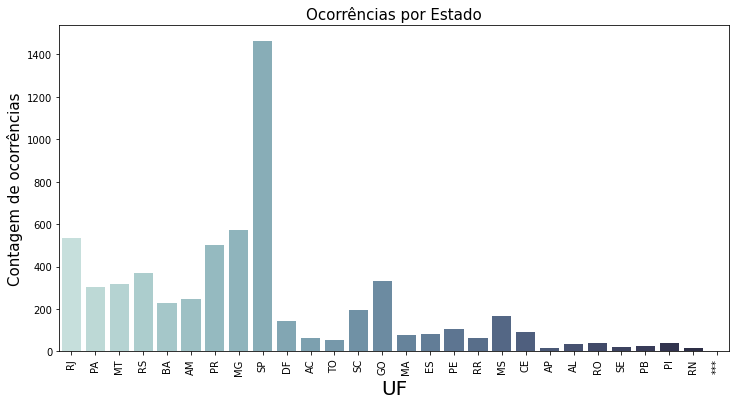

In [ ]:
plt.figure(figsize=[12,6])
x = sns.countplot(x = ocurrences['ocorrencia_uf'],palette="ch:s=.13,rot=-.30" )
plt.title('Ocorrências por Estado', size = 15)
plt.xlabel('UF', size = 20)
plt.ylabel('Contagem de ocorrências', size = 15)
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
plt.show()

 **2 - What is the most frequent type of occurrence among aircraft according to the CENIPA dataset?** 

Occurrences of **`engine failure during flight`** are the most frequent events according to the dataset with **_`12,43%`_**
 of the total cases.

In [ ]:
(ocurrence_types['ocorrencia_tipo'].value_counts(normalize=True).head(1))*100

FALHA DO MOTOR EM VOO    12.430368
Name: ocorrencia_tipo, dtype: float64

**`3` - Of the total number of occurrences, how many occurred while the aircraft was taking off?**

Of the **_`6114`_** total occurrences, **_`538`_** occurred while `the aircraft took off`.

In [ ]:
len(ocurrences['ocorrencia_saida_pista'].loc[ocurrences['ocorrencia_saida_pista'] == 'SIM'])

538

**`4` - Considering the period of time covered by the CENIPA dataset, which was the day, month and year with the highest number of occurrences?**

**_Day_** - On **_`18/12/2013`_**, the highest number of occurrences in a single day was registered, with a total of **` 9 occurrences`**.

**_Month_** - The month with the highest number of occurrences was **_`January 2014`_** with **_`68`_** events.

**_Year_** - The year with the `highest` number of occurrences was **_`2013`_** with **_`654`_** occurrences.

In [ ]:
ocurrences['ocorrencia_dia'].value_counts().head(1)


18/12/2013    9
Name: ocorrencia_dia, dtype: int64

In [ ]:
month = []
for i in range(0, len(ocurrences['ocorrencia_dia'])):
  m =  ocurrences['ocorrencia_dia'][i][3:]
  month.append(m)
pd.DataFrame(month).value_counts().head(1)

01/2014    68
dtype: int64

In [5]:
year = []
for i in range(0, len(ocurrences['ocorrencia_dia'])):
  y =  ocurrences['ocorrencia_dia'][i][6:]
  year.append(y)
pd.DataFrame(year).value_counts().head(1)

2013    654
dtype: int64

`5` - **What is the average number of occurrences per year?**

Considering the `6114` occurrences collected between `2010` and `2021`, there is an average of `510` cases per year.

In [17]:
year = pd.DataFrame(year)


In [15]:
total_ocurrences=len(ocurrences)
total_years=len(year[0].unique())
mean_ocurrences=total_ocurrences/total_years
print(f'{mean_ocurrences:.0f}')

510


`6` - **What is the proportion of accident cases in relation to the total number of occurrences?**

`1930` cases or `31%` of the total occurrences were accidents.

In [ ]:
len(ocurrences.loc[ocurrences['ocorrencia_classificacao'] == 'ACIDENTE'])

1930

`7` - **Regarding aircraft size, what is the most common size of aircraft and what is the engine model of these aircraft?**

As expected, there are more smaller aircraft models than larger ones present in the CENIPA dataset, the size was measured by the number of seats, thus, the most common size is 6 seats, and the vast majority of `6-seat` aircraft have `piston-powered engines`.

In [ ]:
aircrafts['aeronave_assentos'].value_counts().head(1)

6.0    1021
Name: aeronave_assentos, dtype: int64

[Text(0, 0, 'TURBOEIXO'),
 Text(0, 0, 'PISTÃO'),
 Text(0, 0, 'JATO'),
 Text(0, 0, 'TURBOÉLICE'),
 Text(0, 0, 'SEM TRAÇÃO'),
 Text(0, 0, '***')]

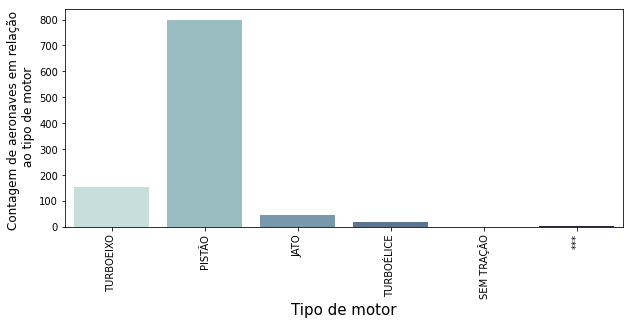

In [ ]:
common_model = aircrafts.groupby('aeronave_assentos').get_group(6.0)
plt.figure(figsize=[10,4])
model = sns.countplot(x = 'aeronave_motor_tipo', data = common_model, palette="ch:s=.13,rot=-.30" )
plt.ylabel('Contagem de aeronaves em relação \n ao tipo de motor', size = 12)
plt.xlabel('Tipo de motor', size = 15)
model.set_xticklabels(model.get_xticklabels(), rotation = 90)

`8` - **If it were possible to measure the efficiency of the recommendations aplication made by ANAC, what would be the level of this indicator in relation to the total of recommendations made according to CENIPA's DATASET?**



Adding the `fulfilled` and `alternatively fulfilled` recommendations, we have the number of `1277` fulfilled recommendations out of a total of `1811`. It is necessary not to consider the `61` recommendations that do not have status. Thus, the ratio of recommendations fulfilled in relation to all that were opened is `71%`.

In [ ]:
recomendations['recomendacao_status'].value_counts()

CUMPRIDA                         1155
AGUARDANDO RESPOSTA               416
CUMPRIDA DE FORMA ALTERNATIVA     122
NÃO CUMPRIDA                      118
***                                61
Name: recomendacao_status, dtype: int64

In [ ]:
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "123"))

In [ ]:
session = driver.session()